# Chapter 8. 감성 분석



## 8.2 감성 사전을 이용한 영화 리뷰 감성 분석

### 8.2.1 NLTK 영화 리뷰 데이터 준비

1: https://www.nltk.org/book/ch02.html

In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print('#sentiment of the first review:', movie_reviews.categories(fileid)) #첫번째 문서의 감성

fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\wousi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


In [5]:
reviews[1]
categories[1]

'neg'

### 8.2.2 TextBlob을 이용한 감성 분석

1: https://textblob.readthedocs.io/en/dev/

https://textblob.readthedocs.io/en/dev/quickstart.html

### TextBlob
#### - 토큰화같은 전처리를 알아서 수행하기 때문에 텍스트를 인수로 바로 넘겨줌.
#### - 토큰화, POS태깅, 명사추출, 문서분류(나이브베이즈, 결정트리)

### 사용법 
#### 앞에 TextBlob.sentiment처럼 붙여줌. 
#### 1) sentiment : 긍정부정
#### 2) words : 토큰화된 단어
#### 3) sentence : 토큰화된 문장
#### 4) tags : POS태깅의 결과
#### 5) noun_phrases : 추출된 명사 리스트 제공

In [7]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [8]:
from textblob import TextBlob

result = TextBlob(reviews[0])
print(result)
print(result.sentiment) # polarity 양수면 긍정, 음수면 부정 subjectivity 의견이면 1, 사실이면 0 

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [9]:
def sentiment_TextBlob(docs):
    results = []

    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

In [15]:
from sklearn.metrics import accuracy_score
print("categories형식:", len(categories)) # list형식(shape작동안함)
print("sentiment형식:", len(sentiment_TextBlob(reviews))) # list형식 
# 정확도의 입력값은 list형식으로 입력
print('#TextBlob을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_TextBlob(reviews)))

categories형식: 2000
sentiment형식: 2000
#TextBlob을 이용한 리뷰 감성분석의 정확도: 0.6


### 8.2.3 AFINN을 이용한 감성 분석

https://github.com/fnielsen/afinn 

(1) http://corpustext.com/reference/sentiment_afinn.html

### AFINN
#### - 별도의 전처리가 필요없고, 텍스트를 그대로 넣어줌. 
#### - score사용법이 TextBlob.sentiment.polarity랑 다르다. 

In [16]:
# !pip install afinn

     ---------------------------------------- 52.6/52.6 KB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=2f9afd62d823d2297c71268a6c0e01cbf93a7eed0ae492bc8f3abccd1c165ca6
  Stored in directory: c:\users\wousi\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [17]:
from afinn import Afinn

def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    results = []

    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

print('#Afinn을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_Afinn(reviews)))

#Afinn을 이용한 리뷰 감성분석의 정확도: 0.664


### 8.2.4 VADER를 이용한 감성 분석

(1) https://github.com/cjhutto/vaderSentiment

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wousi\AppData\Roaming\nltk_data...


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results = []

    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')

    return results

print('#Vader을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_vader(reviews)))

#Vader을 이용한 리뷰 감성분석의 정확도: 0.635


### 이외의 감성분석툴
### - SentiWordNet
### - LIWC(Linguistic Inquiry and Word Count)

### 8.2.5 한글 감성사전
### - KoreanSentimentAnalyze 라이브러리 형태 존재 

1: https://github.com/park1200656/KnuSentiLex   
2: https://github.com/mrlee23/KoreanSentimentAnalyzer

## 8.3 학습을 통한 머신러닝 기반의 감성 분석

### 8.3.1 NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석


In [20]:
from sklearn.model_selection import train_test_split #sklearn에서 제공하는 split 함수를 사용

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용

tfidf = TfidfVectorizer().fit(X_train) 

X_train_tfidf = tfidf.transform(X_train) # train set을 변환
print('#Train set dimension:', X_train_tfidf.shape) # 실제로 몇개의 특성이 사용되었는지 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('#Test set dimension:', X_test_tfidf.shape)

NB_clf = MultinomialNB(alpha=0.01) # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train) #train set을 이용하여 분류기(classifier)를 학습
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

#Train set dimension: (1600, 36189)
#Test set dimension: (400, 36189)
#Train set score: 0.998
#Test set score: 0.797


### 8.3.2 다음 영화 리뷰에 대한 머신러닝 기반 감성 분석


In [22]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [24]:
df.rating.value_counts().sort_index()

0      646
1     1178
2      343
3      379
4      314
5      686
6      610
7      892
8     1287
9     2057
10    6333
Name: rating, dtype: int64

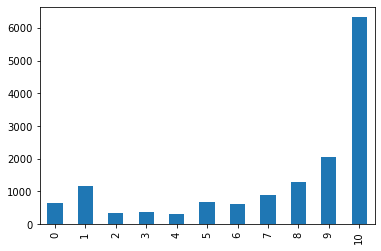

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

df.rating.value_counts().sort_index().plot(kind='bar')
#df.rating.plot.hist(bins=10) #히스토그램을 그릴 수도 있다.
plt.show()

### Confusion Matrix


| | 긍정으로 예측한 리뷰(PP) | 부정으로 예측한 리뷰(PN) |
|---|---|---|
|실제 긍정인 리뷰(P) | True positive(TP) | False negative(FN) |
|실제 부정인 리뷰(N) | False positive(FP) | True negative(TN) |



In [26]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7)
print('#Train set size:', len(X_train))
print('#Test set size:', len(X_test))

from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
okt = Okt()

def twit_tokenizer(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5) #명사, 동사, 형용사를 이용하여 tfidf 생성
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train set size: 11043
#Test set size: 3682


In [29]:
X_train_tfidf#.shape

<11043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 114096 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  #객체를 생성
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score: {:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score: {:.3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score: 0.605
#Regression Test set R2 score: 0.395


In [31]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.888
#Precision for train set: 0.893
#Recall for train set: 0.969
#F1 for train set: 0.929
#Accuracy for test set: 0.848
#Precision for test set: 0.868
#Recall for test set: 0.946
#F1 for test set: 0.905


In [32]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train_senti) # train data를 이용하여 분류기를 학습

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.878
#Precision for train set: 0.878
#Recall for train set: 0.973
#F1 for train set: 0.923
#Accuracy for test set: 0.855
#Precision for test set: 0.866
#Recall for test set: 0.958
#F1 for test set: 0.910


## 8.4 참고문헌

Finn Årup Nielsen A new ANEW: Evaluation of a word list for sentiment analysis in microblogs. Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages 718 in CEUR Workshop Proceedings 93-98. 2011 May.

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.